In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [2]:
import numpy as np
import pandas as pd

## Vis. Libraries
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot

## preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder ## Standardization

## meric
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

## Clusering model
from sklearn.cluster import KMeans

## setting some Libraries
sns.set(rc={"figure.figsize" : [12,8]}, font_scale=1.2 , style="whitegrid", palette="pastel")
pio.templates.default = "ggplot2"
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv') ## read data

EDA

In [4]:
df.sample(3) 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
64,65,Male,63,48,51
36,37,Female,42,34,17
166,167,Male,42,86,20


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

In [7]:
df.isna().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

Text(0, 0.5, 'Spending Score (1-100)')

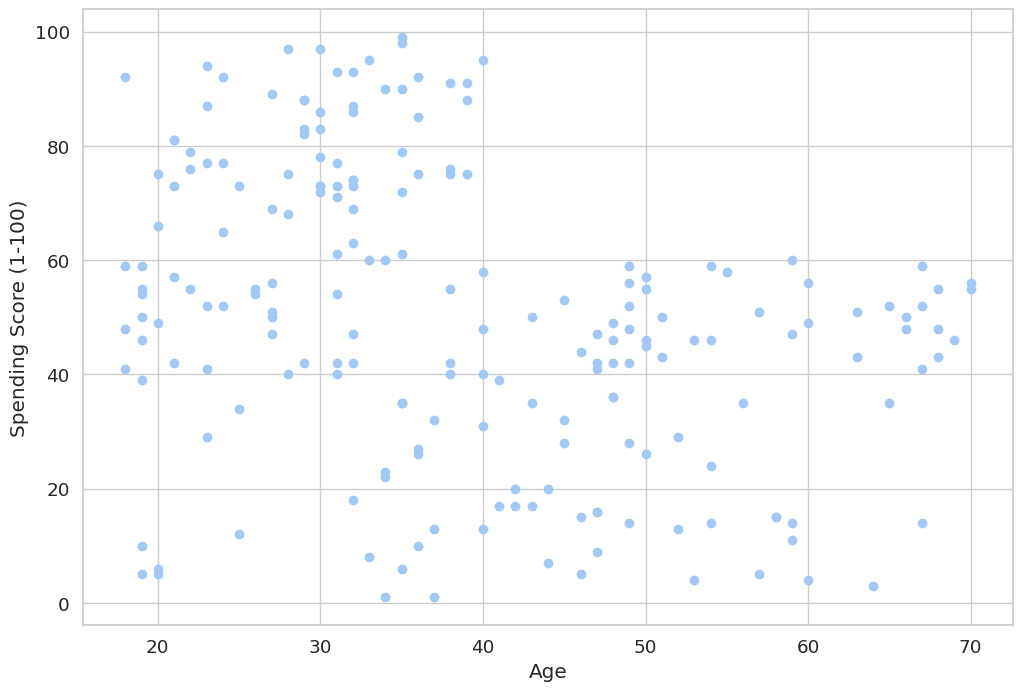

In [8]:
plt.scatter(df['Age'], 
           df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

In [9]:
gender_count = df["Genre"].value_counts(normalize=True)
gender_count.to_frame()

,proportion
Genre,
Female,0.56
Male,0.44


In [10]:
df["Age"].describe().to_frame()

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


/tmp/ipykernel_30/1993827397.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



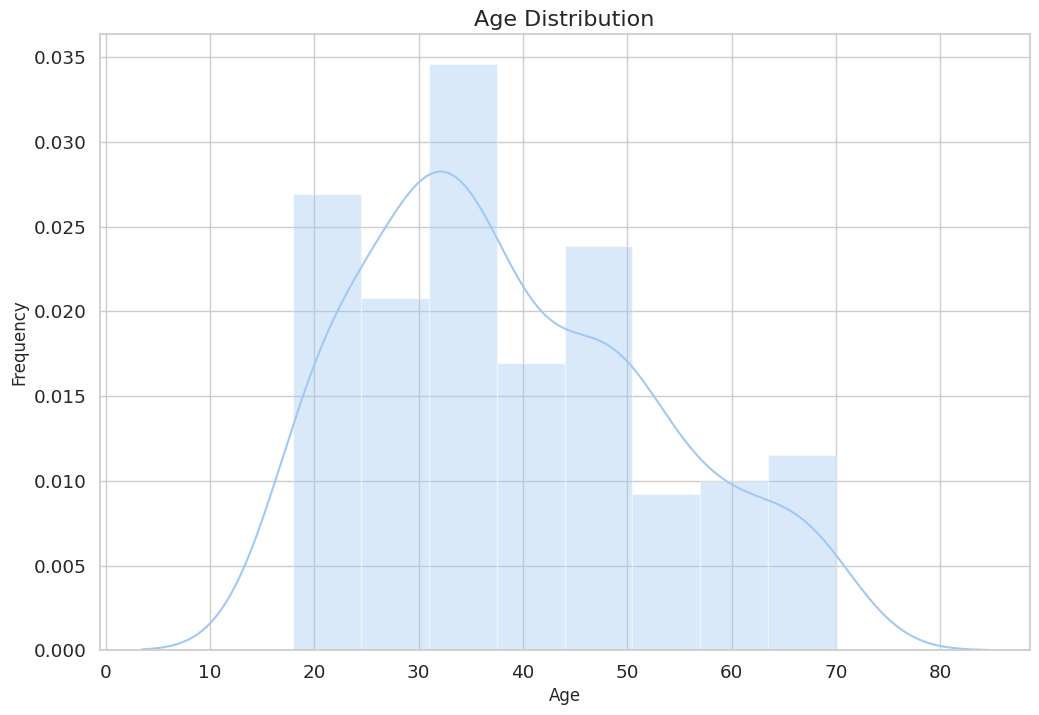

In [11]:
sns.distplot(df["Age"], kde=True)
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [12]:
df["Annual Income (k$)"].describe().to_frame()

,Annual Income (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


/tmp/ipykernel_30/1714801089.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



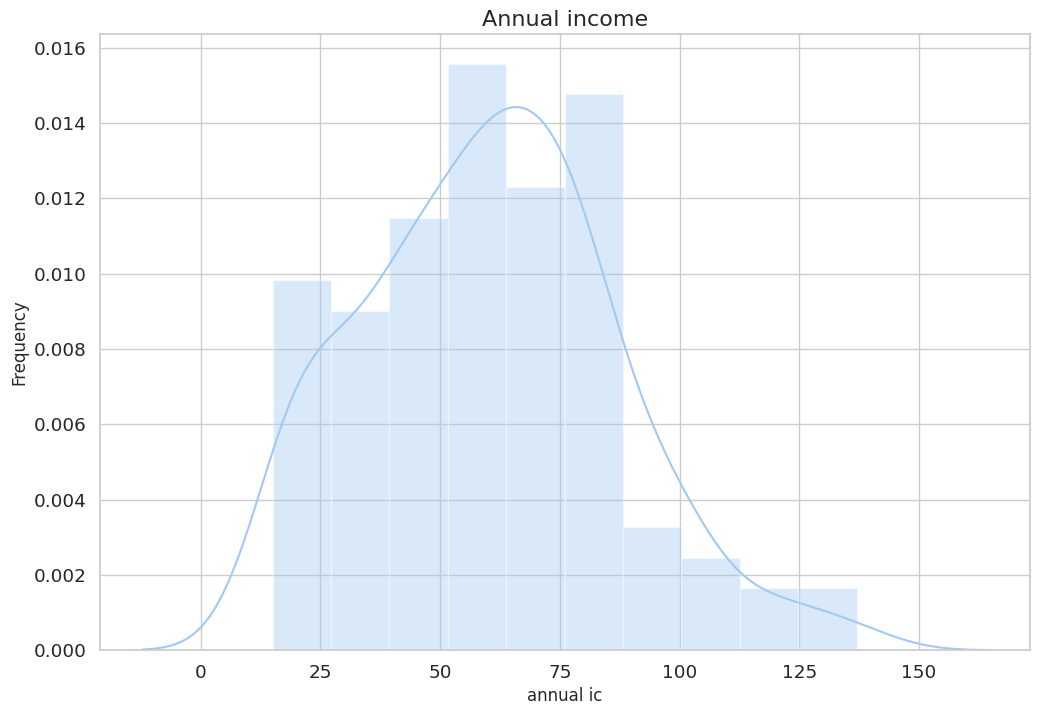

In [13]:
sns.distplot(df["Annual Income (k$)"], kde=True)
plt.title("Annual income", fontsize=16)
plt.xlabel("annual ic", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

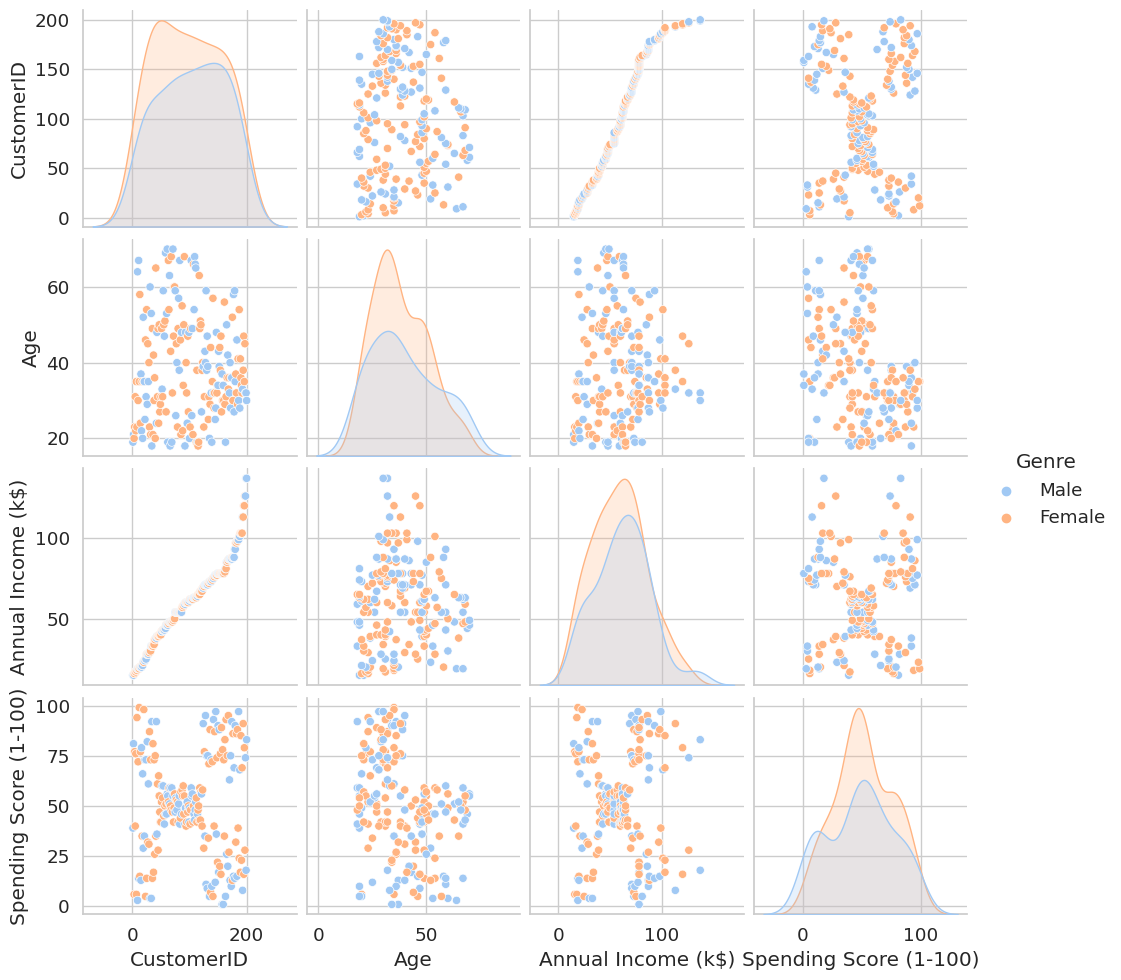

In [14]:
sns.pairplot(df, hue='Genre')  ## Plot the pairplot 
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



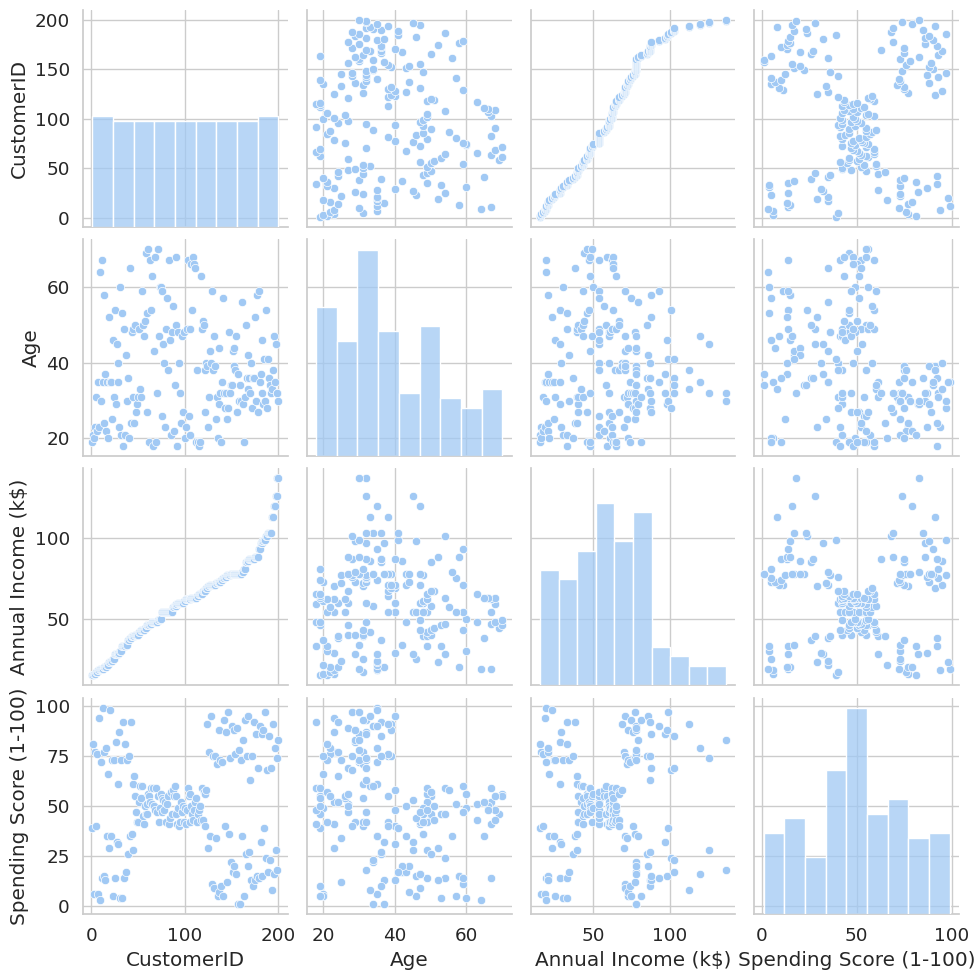

In [15]:
sns.pairplot(df)  ## Plot the pairplot 
plt.show()

In [16]:
numerical_columns = df.select_dtypes(include="number").columns.to_list() ## select numerical cols 
categorical_columns = df.select_dtypes(exclude="number").columns.to_list()

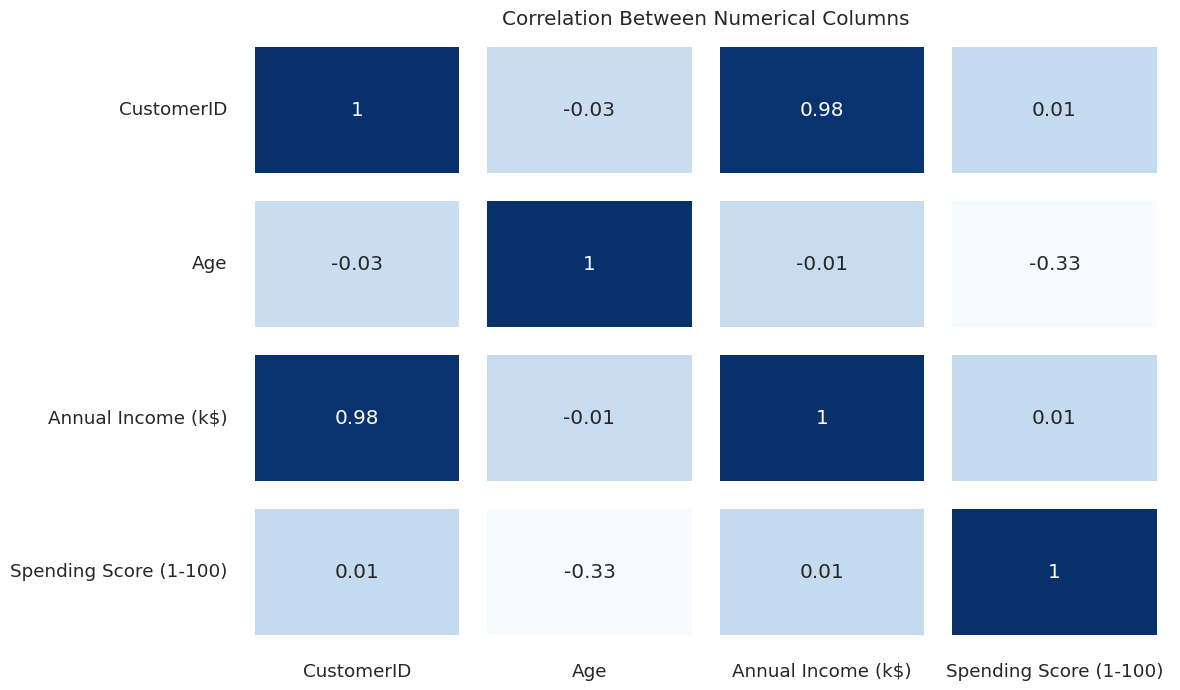

In [17]:
corr_matrix = round(df[numerical_columns].corr(),2)
sns.heatmap(corr_matrix, annot=True, cmap="Blues", cbar=False, linewidths=20)
plt.title("Correlation between numerical columns".title())
plt.show()

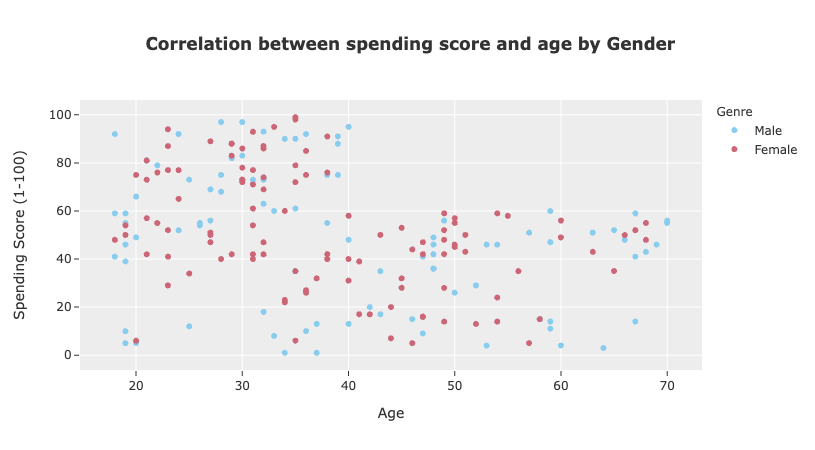

In [18]:
fig = px.scatter(data_frame=df, x="Age", y="Spending Score (1-100)", color="Genre",
                  color_discrete_sequence=px.colors.qualitative.Safe, 
                  title="<b> Correlation between spending score and age by Gender")
fig.show()

K means


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

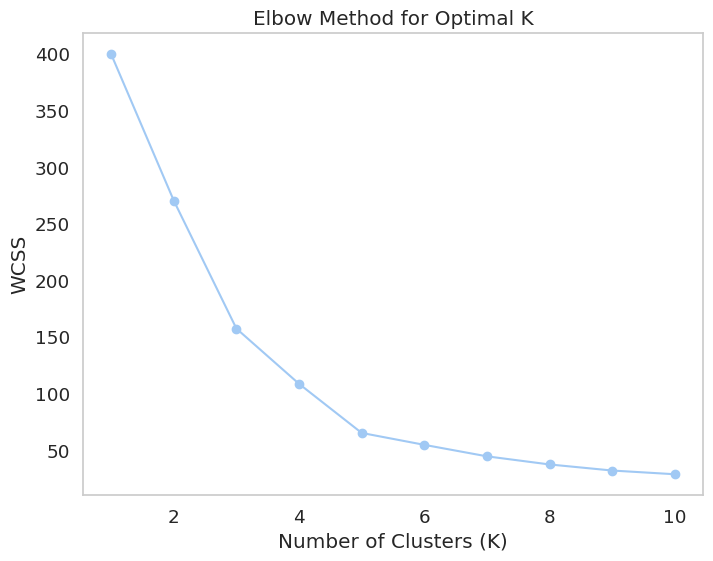

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features to cluster (Annual Income and Spending Score)
X = df.iloc[:, [3, 4]].values

# Standardize the data (recommended for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a list to store the WCSS values
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



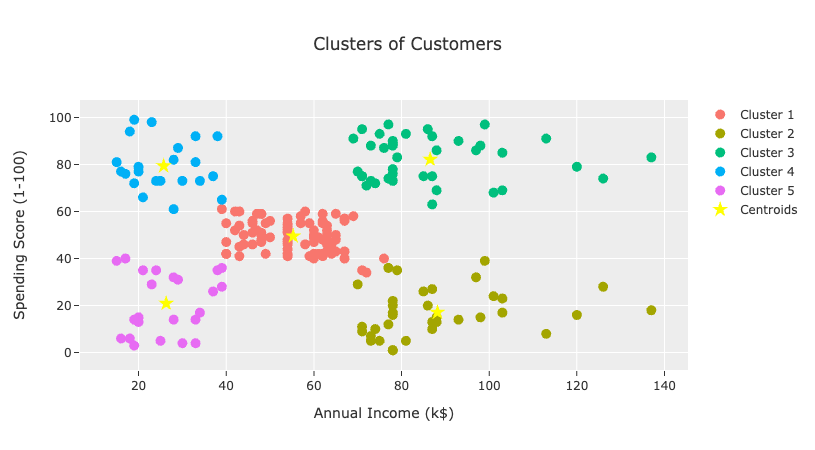

In [32]:
import plotly.graph_objects as go

cluster_traces = []


for i in range(5):
    cluster_trace = go.Scatter(
        x=X[y_kmeans == i, 0],
        y=X[y_kmeans == i, 1],
        mode='markers',
        marker=dict(size=10),
        name=f'Cluster {i + 1}'
    )
    cluster_traces.append(cluster_trace)

# Create a trace for centroids
centroid_trace = go.Scatter(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    mode='markers',
    marker=dict(size=12, color='yellow', symbol='star'),
    name='Centroids'
)

# Create the layout
layout = go.Layout(
    title='Clusters of Customers',
    xaxis=dict(title='Annual Income (k$)'),
    yaxis=dict(title='Spending Score (1-100)'),
)

# Create the figure
fig = go.Figure(data=cluster_traces + [centroid_trace], layout=layout)

# Show the Plotly graph
fig.show()

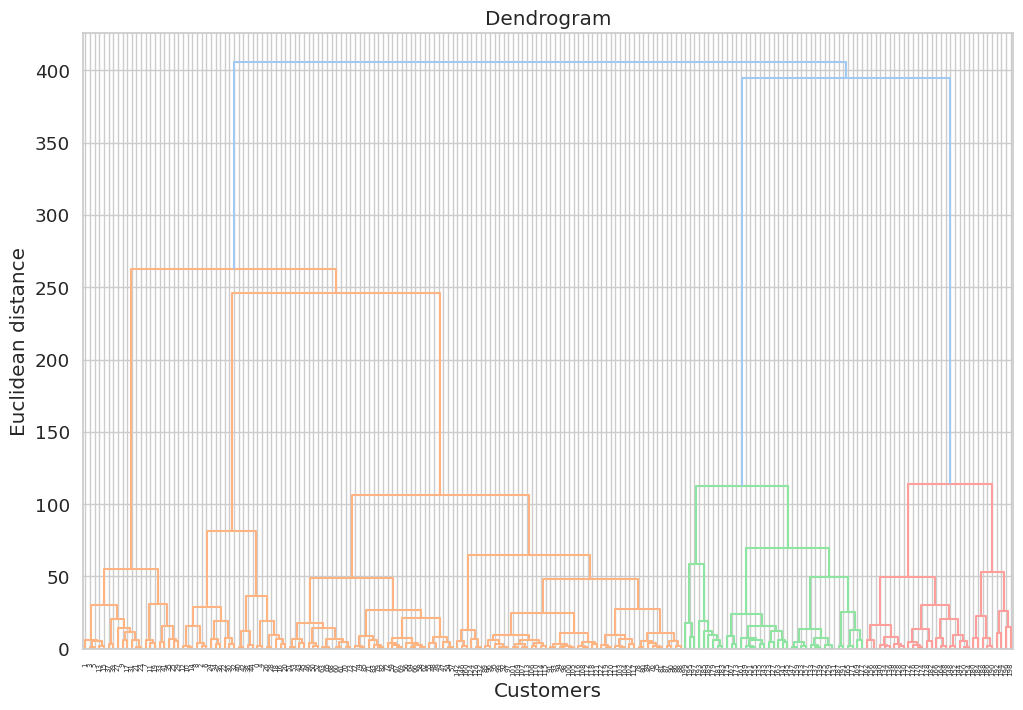

In [22]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



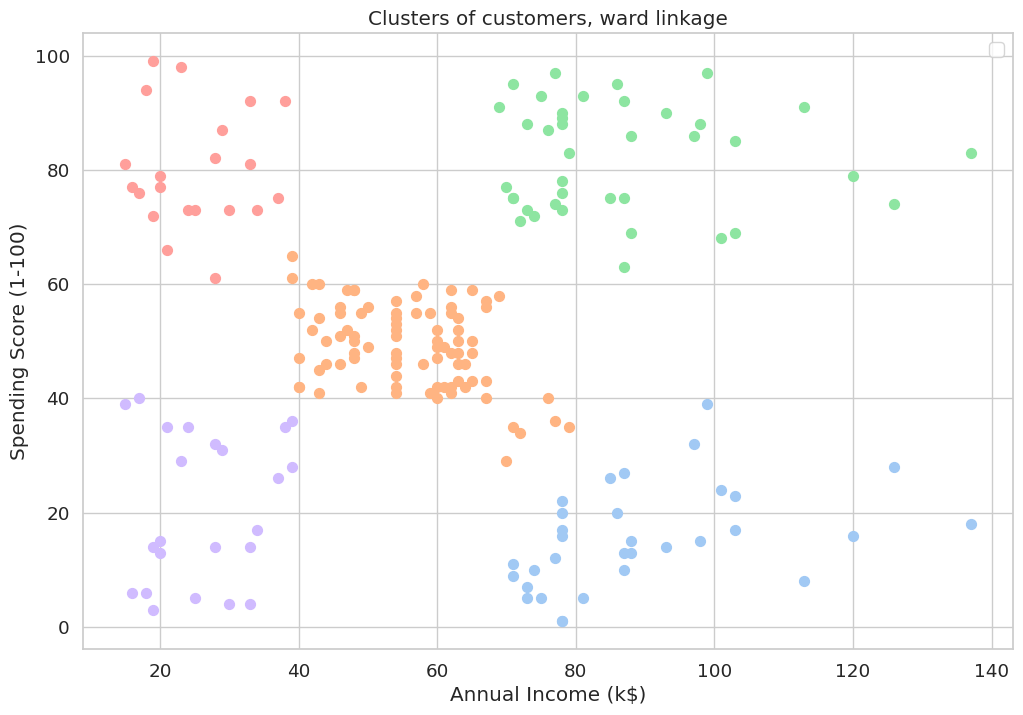

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50)
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50)
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50)
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50)
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50)
plt.title('Clusters of customers, ward linkage')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



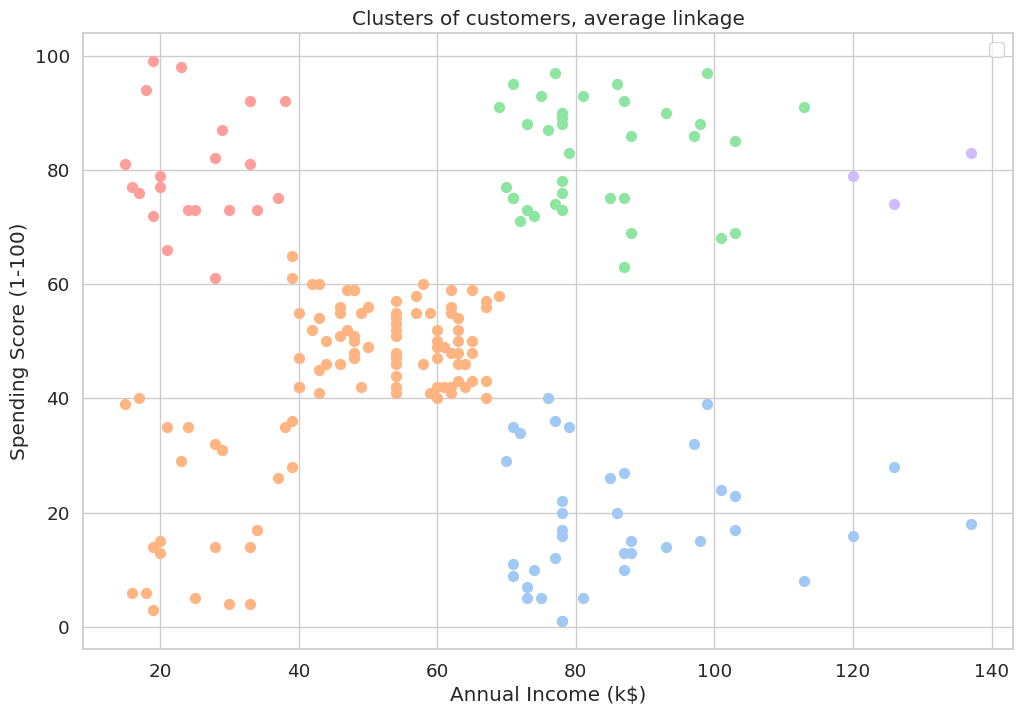

In [34]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50)
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50)
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50)
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50)
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50)
plt.title('Clusters of customers, average linkage')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()